In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
import datetime
import numpy as np

In [2]:
filled_icf = pd.read_csv("icu_icf.csv", sep=";")
filled_icf["date"] = pd.to_datetime(filled_icf["date"])
filled_icf = filled_icf.set_index(["id", "date"])

In [3]:
# BMI

bmi = pd.read_csv("file:///data2/structured data A-UMC/structured data 2017-2020/APROOF_MetingBMI_MetingBMI_B.csv", error_bad_lines=False)[["Pseudo_id", "MeetDatum", "BMI"]]
bmi_c = pd.read_csv("file:///data2/structured data A-UMC/structured data 2021/APROOF_MetingBMI_MetingBMI_C.csv", encoding="UTF-16", sep="|").reset_index()[["level_0", "MeetDatum", "BMI"]]
bmi_c.columns = ["id", "date", "BMI"]
bmi.columns = ["id", "date", "BMI"]

bmi = bmi.append(bmi_c)
bmi["date"] = pd.to_datetime(bmi["date"])
bmi = bmi.groupby(["id", "date"]).mean()

structured_data = filled_icf.join(bmi)

b'Skipping line 12: expected 13 fields, saw 15\nSkipping line 131: expected 13 fields, saw 15\nSkipping line 158: expected 13 fields, saw 15\nSkipping line 205: expected 13 fields, saw 15\nSkipping line 214: expected 13 fields, saw 15\nSkipping line 229: expected 13 fields, saw 15\nSkipping line 505: expected 13 fields, saw 15\nSkipping line 612: expected 13 fields, saw 15\nSkipping line 618: expected 13 fields, saw 15\nSkipping line 661: expected 13 fields, saw 15\nSkipping line 717: expected 13 fields, saw 14\nSkipping line 763: expected 13 fields, saw 15\nSkipping line 787: expected 13 fields, saw 15\nSkipping line 801: expected 13 fields, saw 15\nSkipping line 850: expected 13 fields, saw 15\nSkipping line 866: expected 13 fields, saw 15\nSkipping line 910: expected 13 fields, saw 15\nSkipping line 923: expected 13 fields, saw 15\nSkipping line 948: expected 13 fields, saw 15\nSkipping line 983: expected 13 fields, saw 15\nSkipping line 1075: expected 13 fields, saw 15\nSkipping li

In [5]:
# blood pressure

blood_pressure = pd.read_csv("file:///data2/structured data A-UMC/structured data 2017-2020/APROOF_MetingBloeddrukGemiddelde_MetingBloeddrukGemiddelde_B.csv", error_bad_lines=False)[["Pseudo_id", "MeetDatum", "BloeddrukGemiddelde"]]
blood_pressure_c = pd.read_csv("file:///data2/structured data A-UMC/structured data 2021/APROOF_MetingBloeddrukGemiddelde_MetingBloeddrukGemiddelde_C.csv", encoding="utf-16", sep="|").reset_index()[["level_0", "MeetDatum", "BloeddrukGemiddelde"]]

blood_pressure.columns = ["id", "date", "bloodPressure"]
blood_pressure_c.columns = ["id", "date", "bloodPressure"]
blood_pressure = blood_pressure.append(blood_pressure_c)
blood_pressure["date"] = pd.to_datetime(blood_pressure["date"])
blood_pressure = blood_pressure.groupby(["id", "date"]).mean()

structured_data = structured_data.join(blood_pressure)

b'Skipping line 186: expected 13 fields, saw 15\nSkipping line 390: expected 13 fields, saw 15\nSkipping line 602: expected 13 fields, saw 15\nSkipping line 1064: expected 13 fields, saw 15\nSkipping line 1085: expected 13 fields, saw 15\nSkipping line 1587: expected 13 fields, saw 15\nSkipping line 1719: expected 13 fields, saw 15\nSkipping line 1760: expected 13 fields, saw 15\nSkipping line 2024: expected 13 fields, saw 15\nSkipping line 2126: expected 13 fields, saw 15\nSkipping line 2216: expected 13 fields, saw 15\nSkipping line 2242: expected 13 fields, saw 15\nSkipping line 2249: expected 13 fields, saw 15\nSkipping line 2831: expected 13 fields, saw 15\nSkipping line 2832: expected 13 fields, saw 15\nSkipping line 3021: expected 13 fields, saw 15\nSkipping line 3090: expected 13 fields, saw 15\nSkipping line 3246: expected 13 fields, saw 15\nSkipping line 3332: expected 13 fields, saw 15\nSkipping line 3337: expected 13 fields, saw 15\nSkipping line 3433: expected 13 fields, s

b'Skipping line 132127: expected 13 fields, saw 15\nSkipping line 132309: expected 13 fields, saw 15\nSkipping line 132343: expected 13 fields, saw 15\nSkipping line 132790: expected 13 fields, saw 15\nSkipping line 132833: expected 13 fields, saw 15\nSkipping line 132860: expected 13 fields, saw 15\nSkipping line 132887: expected 13 fields, saw 15\nSkipping line 133120: expected 13 fields, saw 15\nSkipping line 133337: expected 13 fields, saw 15\nSkipping line 133340: expected 13 fields, saw 15\nSkipping line 133738: expected 13 fields, saw 15\nSkipping line 133800: expected 13 fields, saw 15\nSkipping line 133869: expected 13 fields, saw 15\nSkipping line 134031: expected 13 fields, saw 15\nSkipping line 134047: expected 13 fields, saw 15\nSkipping line 134061: expected 13 fields, saw 15\nSkipping line 134301: expected 13 fields, saw 15\nSkipping line 134435: expected 13 fields, saw 15\nSkipping line 134522: expected 13 fields, saw 15\nSkipping line 134692: expected 13 fields, saw 15

b'Skipping line 264124: expected 13 fields, saw 15\nSkipping line 264535: expected 13 fields, saw 15\nSkipping line 264639: expected 13 fields, saw 15\nSkipping line 264812: expected 13 fields, saw 15\nSkipping line 264824: expected 13 fields, saw 15\nSkipping line 264832: expected 13 fields, saw 15\nSkipping line 265200: expected 13 fields, saw 15\nSkipping line 265225: expected 13 fields, saw 15\nSkipping line 265597: expected 13 fields, saw 15\nSkipping line 265603: expected 13 fields, saw 15\nSkipping line 265727: expected 13 fields, saw 15\nSkipping line 265742: expected 13 fields, saw 15\nSkipping line 265789: expected 13 fields, saw 15\nSkipping line 265830: expected 13 fields, saw 15\nSkipping line 265854: expected 13 fields, saw 15\nSkipping line 266074: expected 13 fields, saw 15\nSkipping line 266075: expected 13 fields, saw 15\nSkipping line 266129: expected 13 fields, saw 15\nSkipping line 266274: expected 13 fields, saw 15\nSkipping line 266297: expected 13 fields, saw 15

b'Skipping line 396164: expected 13 fields, saw 15\nSkipping line 396210: expected 13 fields, saw 15\nSkipping line 396610: expected 13 fields, saw 15\nSkipping line 396611: expected 13 fields, saw 15\nSkipping line 396780: expected 13 fields, saw 15\nSkipping line 397064: expected 13 fields, saw 15\nSkipping line 397224: expected 13 fields, saw 15\nSkipping line 397279: expected 13 fields, saw 15\nSkipping line 397443: expected 13 fields, saw 15\nSkipping line 397534: expected 13 fields, saw 15\nSkipping line 397615: expected 13 fields, saw 15\nSkipping line 397631: expected 13 fields, saw 15\nSkipping line 397828: expected 13 fields, saw 15\nSkipping line 397888: expected 13 fields, saw 15\nSkipping line 398133: expected 13 fields, saw 15\nSkipping line 398174: expected 13 fields, saw 15\nSkipping line 398337: expected 13 fields, saw 15\nSkipping line 398372: expected 13 fields, saw 15\nSkipping line 398404: expected 13 fields, saw 15\nSkipping line 398440: expected 13 fields, saw 15

b'Skipping line 528264: expected 13 fields, saw 15\nSkipping line 528281: expected 13 fields, saw 15\nSkipping line 528384: expected 13 fields, saw 15\nSkipping line 528475: expected 13 fields, saw 15\nSkipping line 528502: expected 13 fields, saw 15\nSkipping line 528618: expected 13 fields, saw 15\nSkipping line 528776: expected 13 fields, saw 15\nSkipping line 528822: expected 13 fields, saw 15\nSkipping line 528915: expected 13 fields, saw 15\nSkipping line 528964: expected 13 fields, saw 15\nSkipping line 529027: expected 13 fields, saw 15\nSkipping line 529170: expected 13 fields, saw 15\nSkipping line 529245: expected 13 fields, saw 15\nSkipping line 529352: expected 13 fields, saw 15\nSkipping line 529391: expected 13 fields, saw 15\nSkipping line 529489: expected 13 fields, saw 15\nSkipping line 529570: expected 13 fields, saw 15\nSkipping line 529639: expected 13 fields, saw 15\nSkipping line 529678: expected 13 fields, saw 15\nSkipping line 529871: expected 13 fields, saw 15

b'Skipping line 660326: expected 13 fields, saw 15\nSkipping line 660460: expected 13 fields, saw 15\nSkipping line 660589: expected 13 fields, saw 15\nSkipping line 660601: expected 13 fields, saw 15\nSkipping line 660832: expected 13 fields, saw 15\nSkipping line 661131: expected 13 fields, saw 15\nSkipping line 661335: expected 13 fields, saw 15\nSkipping line 661460: expected 13 fields, saw 15\nSkipping line 661558: expected 13 fields, saw 15\nSkipping line 661584: expected 13 fields, saw 15\nSkipping line 662360: expected 13 fields, saw 15\nSkipping line 662399: expected 13 fields, saw 15\nSkipping line 662566: expected 13 fields, saw 15\nSkipping line 662666: expected 13 fields, saw 15\nSkipping line 662705: expected 13 fields, saw 15\nSkipping line 662709: expected 13 fields, saw 15\nSkipping line 662812: expected 13 fields, saw 15\nSkipping line 662868: expected 13 fields, saw 15\nSkipping line 662975: expected 13 fields, saw 15\nSkipping line 663121: expected 13 fields, saw 15

b'Skipping line 792242: expected 13 fields, saw 15\nSkipping line 792245: expected 13 fields, saw 15\nSkipping line 792418: expected 13 fields, saw 15\nSkipping line 792512: expected 13 fields, saw 15\nSkipping line 792835: expected 13 fields, saw 15\nSkipping line 793121: expected 13 fields, saw 15\nSkipping line 793281: expected 13 fields, saw 15\nSkipping line 793484: expected 13 fields, saw 15\nSkipping line 793524: expected 13 fields, saw 15\nSkipping line 793610: expected 13 fields, saw 15\nSkipping line 793616: expected 13 fields, saw 15\nSkipping line 793676: expected 13 fields, saw 15\nSkipping line 793836: expected 13 fields, saw 15\nSkipping line 794052: expected 13 fields, saw 15\nSkipping line 794265: expected 13 fields, saw 15\nSkipping line 794338: expected 13 fields, saw 15\nSkipping line 794661: expected 13 fields, saw 15\nSkipping line 794667: expected 13 fields, saw 15\nSkipping line 794698: expected 13 fields, saw 15\nSkipping line 794907: expected 13 fields, saw 15

b'Skipping line 924286: expected 13 fields, saw 15\nSkipping line 924540: expected 13 fields, saw 15\nSkipping line 924544: expected 13 fields, saw 15\nSkipping line 924597: expected 13 fields, saw 15\nSkipping line 924689: expected 13 fields, saw 15\nSkipping line 924881: expected 13 fields, saw 15\nSkipping line 925130: expected 13 fields, saw 15\nSkipping line 925260: expected 13 fields, saw 15\nSkipping line 925268: expected 13 fields, saw 15\nSkipping line 925330: expected 13 fields, saw 15\nSkipping line 925513: expected 13 fields, saw 15\nSkipping line 925673: expected 13 fields, saw 15\nSkipping line 925712: expected 13 fields, saw 15\nSkipping line 925733: expected 13 fields, saw 15\nSkipping line 926040: expected 13 fields, saw 15\nSkipping line 926121: expected 13 fields, saw 15\nSkipping line 926163: expected 13 fields, saw 15\nSkipping line 926902: expected 13 fields, saw 15\nSkipping line 926903: expected 13 fields, saw 15\nSkipping line 926915: expected 13 fields, saw 15

b'Skipping line 1056235: expected 13 fields, saw 15\nSkipping line 1056455: expected 13 fields, saw 15\nSkipping line 1056584: expected 13 fields, saw 15\nSkipping line 1056708: expected 13 fields, saw 15\nSkipping line 1056923: expected 13 fields, saw 15\nSkipping line 1057028: expected 13 fields, saw 15\nSkipping line 1057171: expected 13 fields, saw 15\nSkipping line 1057402: expected 13 fields, saw 15\nSkipping line 1057403: expected 13 fields, saw 15\nSkipping line 1057465: expected 13 fields, saw 15\nSkipping line 1057646: expected 13 fields, saw 15\nSkipping line 1057706: expected 13 fields, saw 15\nSkipping line 1057882: expected 13 fields, saw 15\nSkipping line 1057885: expected 13 fields, saw 15\nSkipping line 1057888: expected 13 fields, saw 15\nSkipping line 1058025: expected 13 fields, saw 15\nSkipping line 1058041: expected 13 fields, saw 15\nSkipping line 1058155: expected 13 fields, saw 15\nSkipping line 1058160: expected 13 fields, saw 15\nSkipping line 1058277: expect

b'Skipping line 1188560: expected 13 fields, saw 15\nSkipping line 1188588: expected 13 fields, saw 15\nSkipping line 1189097: expected 13 fields, saw 15\nSkipping line 1189237: expected 13 fields, saw 15\nSkipping line 1189454: expected 13 fields, saw 15\nSkipping line 1189521: expected 13 fields, saw 15\nSkipping line 1189819: expected 13 fields, saw 15\nSkipping line 1189862: expected 13 fields, saw 15\nSkipping line 1190095: expected 13 fields, saw 15\nSkipping line 1190235: expected 13 fields, saw 15\nSkipping line 1190314: expected 13 fields, saw 15\nSkipping line 1190523: expected 13 fields, saw 15\nSkipping line 1190621: expected 13 fields, saw 15\nSkipping line 1190977: expected 13 fields, saw 15\nSkipping line 1191039: expected 13 fields, saw 15\nSkipping line 1191293: expected 13 fields, saw 15\nSkipping line 1191384: expected 13 fields, saw 15\nSkipping line 1192007: expected 13 fields, saw 15\nSkipping line 1192104: expected 13 fields, saw 15\nSkipping line 1192151: expect

b'Skipping line 1320305: expected 13 fields, saw 15\nSkipping line 1320432: expected 13 fields, saw 15\nSkipping line 1320645: expected 13 fields, saw 15\nSkipping line 1320646: expected 13 fields, saw 15\nSkipping line 1320873: expected 13 fields, saw 15\nSkipping line 1320880: expected 13 fields, saw 15\nSkipping line 1321026: expected 13 fields, saw 15\nSkipping line 1321052: expected 13 fields, saw 15\nSkipping line 1321087: expected 13 fields, saw 15\nSkipping line 1321600: expected 13 fields, saw 15\nSkipping line 1321611: expected 13 fields, saw 15\nSkipping line 1321763: expected 13 fields, saw 15\nSkipping line 1321773: expected 13 fields, saw 15\nSkipping line 1321957: expected 13 fields, saw 15\nSkipping line 1322073: expected 13 fields, saw 15\nSkipping line 1322207: expected 13 fields, saw 15\nSkipping line 1322230: expected 13 fields, saw 15\nSkipping line 1322231: expected 13 fields, saw 15\nSkipping line 1322385: expected 13 fields, saw 15\nSkipping line 1322470: expect

b'Skipping line 1452358: expected 13 fields, saw 15\nSkipping line 1452736: expected 13 fields, saw 15\nSkipping line 1452768: expected 13 fields, saw 15\nSkipping line 1452835: expected 13 fields, saw 15\nSkipping line 1452903: expected 13 fields, saw 15\nSkipping line 1453001: expected 13 fields, saw 15\nSkipping line 1453004: expected 13 fields, saw 15\nSkipping line 1453165: expected 13 fields, saw 15\nSkipping line 1453243: expected 13 fields, saw 15\nSkipping line 1453398: expected 13 fields, saw 15\nSkipping line 1453500: expected 13 fields, saw 15\nSkipping line 1453812: expected 13 fields, saw 15\nSkipping line 1453968: expected 13 fields, saw 15\nSkipping line 1453996: expected 13 fields, saw 15\nSkipping line 1454064: expected 13 fields, saw 15\nSkipping line 1454377: expected 13 fields, saw 15\nSkipping line 1454692: expected 13 fields, saw 15\nSkipping line 1454975: expected 13 fields, saw 15\nSkipping line 1455056: expected 13 fields, saw 15\nSkipping line 1455100: expect

b'Skipping line 1585042: expected 13 fields, saw 15\nSkipping line 1585056: expected 13 fields, saw 15\nSkipping line 1585399: expected 13 fields, saw 15\nSkipping line 1585457: expected 13 fields, saw 15\nSkipping line 1585465: expected 13 fields, saw 15\nSkipping line 1585466: expected 13 fields, saw 15\nSkipping line 1585911: expected 13 fields, saw 15\nSkipping line 1585978: expected 13 fields, saw 15\nSkipping line 1586324: expected 13 fields, saw 15\nSkipping line 1586334: expected 13 fields, saw 15\nSkipping line 1586531: expected 13 fields, saw 15\nSkipping line 1586791: expected 13 fields, saw 15\nSkipping line 1587261: expected 13 fields, saw 15\nSkipping line 1587325: expected 13 fields, saw 15\nSkipping line 1587462: expected 13 fields, saw 15\nSkipping line 1587587: expected 13 fields, saw 15\nSkipping line 1587597: expected 13 fields, saw 15\nSkipping line 1587779: expected 13 fields, saw 15\nSkipping line 1587780: expected 13 fields, saw 15\nSkipping line 1587842: expect

b'Skipping line 1716828: expected 13 fields, saw 15\nSkipping line 1716845: expected 13 fields, saw 15\nSkipping line 1716972: expected 13 fields, saw 15\nSkipping line 1717371: expected 13 fields, saw 15\nSkipping line 1717727: expected 13 fields, saw 15\nSkipping line 1718020: expected 13 fields, saw 15\nSkipping line 1718110: expected 13 fields, saw 15\nSkipping line 1718426: expected 13 fields, saw 15\nSkipping line 1718570: expected 13 fields, saw 15\nSkipping line 1718571: expected 13 fields, saw 15\nSkipping line 1718689: expected 13 fields, saw 15\nSkipping line 1719205: expected 13 fields, saw 15\nSkipping line 1719333: expected 13 fields, saw 15\nSkipping line 1719430: expected 13 fields, saw 15\nSkipping line 1719575: expected 13 fields, saw 15\nSkipping line 1719746: expected 13 fields, saw 15\nSkipping line 1720199: expected 13 fields, saw 15\nSkipping line 1720228: expected 13 fields, saw 15\nSkipping line 1720347: expected 13 fields, saw 15\nSkipping line 1720460: expect

In [6]:
#temperature

temperature = pd.read_csv("file:///data2/structured data A-UMC/structured data 2017-2020/APROOF_MetingLichaamsTemperatuur_MetingLichaamsTemperatuur_B.csv", error_bad_lines=False)[["Pseudo_id", "MeetDatum", "Temperatuur"]]
temperature_c = pd.read_csv("file:///data2/structured data A-UMC/structured data 2021/APROOF_MetingLichaamsTemperatuur_MetingLichaamsTemperatuur_C.csv", encoding="utf-16", sep="|").reset_index()[["level_0", "MeetDatum", "Temperatuur"]]

temperature.columns = ["id", "date", "temperature"]
temperature_c.columns = ["id", "date", "temperature"]
temperature = temperature.append(temperature_c)
temperature["date"] = pd.to_datetime(temperature["date"])

temperature = temperature.groupby(["id", "date"]).mean()[["temperature"]]

structured_data = structured_data.join(temperature)

b'Skipping line 29: expected 13 fields, saw 15\nSkipping line 39: expected 13 fields, saw 15\nSkipping line 45: expected 13 fields, saw 15\nSkipping line 89: expected 13 fields, saw 15\nSkipping line 134: expected 13 fields, saw 15\nSkipping line 161: expected 13 fields, saw 15\nSkipping line 221: expected 13 fields, saw 15\nSkipping line 302: expected 13 fields, saw 15\nSkipping line 385: expected 13 fields, saw 15\nSkipping line 399: expected 13 fields, saw 15\nSkipping line 533: expected 13 fields, saw 15\nSkipping line 597: expected 13 fields, saw 15\nSkipping line 603: expected 13 fields, saw 15\nSkipping line 666: expected 13 fields, saw 15\nSkipping line 698: expected 13 fields, saw 15\nSkipping line 760: expected 13 fields, saw 15\nSkipping line 768: expected 13 fields, saw 15\nSkipping line 781: expected 13 fields, saw 15\nSkipping line 874: expected 13 fields, saw 15\nSkipping line 914: expected 13 fields, saw 15\nSkipping line 934: expected 13 fields, saw 15\nSkipping line 9

b'Skipping line 134542: expected 13 fields, saw 15\nSkipping line 134553: expected 13 fields, saw 15\nSkipping line 134576: expected 13 fields, saw 15\nSkipping line 134675: expected 13 fields, saw 15\nSkipping line 134689: expected 13 fields, saw 15\nSkipping line 134719: expected 13 fields, saw 15\nSkipping line 134738: expected 13 fields, saw 15\nSkipping line 134774: expected 13 fields, saw 15\nSkipping line 134822: expected 13 fields, saw 15\nSkipping line 134845: expected 13 fields, saw 15\nSkipping line 134913: expected 13 fields, saw 15\nSkipping line 135034: expected 13 fields, saw 15\nSkipping line 135035: expected 13 fields, saw 15\nSkipping line 135048: expected 13 fields, saw 15\nSkipping line 135104: expected 13 fields, saw 15\nSkipping line 135170: expected 13 fields, saw 15\nSkipping line 135252: expected 13 fields, saw 15\nSkipping line 135278: expected 13 fields, saw 15\nSkipping line 135352: expected 13 fields, saw 15\nSkipping line 135364: expected 13 fields, saw 15

b'Skipping line 269010: expected 13 fields, saw 15\nSkipping line 269077: expected 13 fields, saw 15\nSkipping line 269125: expected 13 fields, saw 15\nSkipping line 269199: expected 13 fields, saw 15\nSkipping line 269211: expected 13 fields, saw 15\nSkipping line 269301: expected 13 fields, saw 15\nSkipping line 269321: expected 13 fields, saw 15\nSkipping line 269368: expected 13 fields, saw 15\nSkipping line 269379: expected 13 fields, saw 15\nSkipping line 269422: expected 13 fields, saw 15\nSkipping line 269481: expected 13 fields, saw 15\nSkipping line 269488: expected 13 fields, saw 15\nSkipping line 269533: expected 13 fields, saw 15\nSkipping line 269557: expected 13 fields, saw 15\nSkipping line 269581: expected 13 fields, saw 15\nSkipping line 269583: expected 13 fields, saw 15\nSkipping line 269682: expected 13 fields, saw 15\nSkipping line 269737: expected 13 fields, saw 15\nSkipping line 269790: expected 13 fields, saw 15\nSkipping line 269840: expected 13 fields, saw 15

b'Skipping line 403481: expected 13 fields, saw 15\nSkipping line 403492: expected 13 fields, saw 15\nSkipping line 403563: expected 13 fields, saw 15\nSkipping line 403585: expected 13 fields, saw 15\nSkipping line 403594: expected 13 fields, saw 15\nSkipping line 403605: expected 13 fields, saw 15\nSkipping line 403735: expected 13 fields, saw 15\nSkipping line 403746: expected 13 fields, saw 15\nSkipping line 403754: expected 13 fields, saw 15\nSkipping line 403816: expected 13 fields, saw 15\nSkipping line 403835: expected 13 fields, saw 15\nSkipping line 403920: expected 13 fields, saw 15\nSkipping line 403938: expected 13 fields, saw 15\nSkipping line 403970: expected 13 fields, saw 15\nSkipping line 404073: expected 13 fields, saw 15\nSkipping line 404134: expected 13 fields, saw 15\nSkipping line 404138: expected 13 fields, saw 15\nSkipping line 404183: expected 13 fields, saw 15\nSkipping line 404218: expected 13 fields, saw 15\nSkipping line 404228: expected 13 fields, saw 15

b'Skipping line 538101: expected 13 fields, saw 15\nSkipping line 538175: expected 13 fields, saw 15\nSkipping line 538222: expected 13 fields, saw 15\nSkipping line 538295: expected 13 fields, saw 15\nSkipping line 538320: expected 13 fields, saw 15\nSkipping line 538330: expected 13 fields, saw 15\nSkipping line 538360: expected 13 fields, saw 15\nSkipping line 538395: expected 13 fields, saw 15\nSkipping line 538416: expected 13 fields, saw 15\nSkipping line 538434: expected 13 fields, saw 15\nSkipping line 538478: expected 13 fields, saw 15\nSkipping line 538527: expected 13 fields, saw 15\nSkipping line 538532: expected 13 fields, saw 15\nSkipping line 538583: expected 13 fields, saw 15\nSkipping line 538608: expected 13 fields, saw 15\nSkipping line 538638: expected 13 fields, saw 15\nSkipping line 538749: expected 13 fields, saw 15\nSkipping line 538761: expected 13 fields, saw 15\nSkipping line 538787: expected 13 fields, saw 15\nSkipping line 538849: expected 13 fields, saw 15

In [8]:
# o2 saturation

o2 = pd.read_csv("file:///data2/structured data A-UMC/structured data 2017-2020/APROOF_Metingo2Saturatie_Metingo2Saturatie_B.csv", error_bad_lines=False)[["Pseudo_id", "MeetDatum", "o2Saturatie"]]
o2_c = pd.read_csv("file:///data2/structured data A-UMC/structured data 2021/APROOF_Metingo2Saturatie_Metingo2Saturatie_C.csv", encoding="utf-16", sep="|").reset_index()[["level_0", "MeetDatum", "o2Saturatie"]]

o2.columns = ["id", "date", "o2Saturation"]
o2_c.columns = ["id", "date", "o2Saturation"]

o2 = o2.append(o2_c)
o2["date"] = pd.to_datetime(o2["date"])
o2 = o2[o2.o2Saturation != " NIERTRANS"]
o2["o2Saturation"] = pd.to_numeric(o2["o2Saturation"])

o2 = o2.groupby(["id", "date"]).mean()

structured_data = structured_data.join(o2)

b'Skipping line 361: expected 13 fields, saw 15\nSkipping line 739: expected 13 fields, saw 15\nSkipping line 781: expected 13 fields, saw 15\nSkipping line 835: expected 13 fields, saw 15\nSkipping line 1015: expected 13 fields, saw 15\nSkipping line 1351: expected 13 fields, saw 15\nSkipping line 1519: expected 13 fields, saw 15\nSkipping line 1934: expected 13 fields, saw 15\nSkipping line 2200: expected 13 fields, saw 15\nSkipping line 2232: expected 13 fields, saw 15\nSkipping line 2264: expected 13 fields, saw 15\nSkipping line 2472: expected 13 fields, saw 15\nSkipping line 2926: expected 13 fields, saw 15\nSkipping line 2942: expected 13 fields, saw 15\nSkipping line 3230: expected 13 fields, saw 15\nSkipping line 3477: expected 13 fields, saw 15\nSkipping line 3725: expected 13 fields, saw 15\nSkipping line 3831: expected 13 fields, saw 15\nSkipping line 3832: expected 13 fields, saw 15\nSkipping line 4021: expected 13 fields, saw 15\nSkipping line 4489: expected 13 fields, sa

b'Skipping line 131754: expected 13 fields, saw 15\nSkipping line 131777: expected 13 fields, saw 15\nSkipping line 131941: expected 13 fields, saw 15\nSkipping line 132323: expected 13 fields, saw 15\nSkipping line 132381: expected 13 fields, saw 15\nSkipping line 132892: expected 13 fields, saw 15\nSkipping line 133013: expected 13 fields, saw 15\nSkipping line 133601: expected 13 fields, saw 15\nSkipping line 133608: expected 13 fields, saw 15\nSkipping line 133893: expected 13 fields, saw 15\nSkipping line 134173: expected 13 fields, saw 15\nSkipping line 134315: expected 13 fields, saw 15\nSkipping line 134351: expected 13 fields, saw 15\nSkipping line 134454: expected 13 fields, saw 15\nSkipping line 134566: expected 13 fields, saw 15\nSkipping line 134611: expected 13 fields, saw 15\nSkipping line 134966: expected 13 fields, saw 15\nSkipping line 135160: expected 13 fields, saw 15\nSkipping line 135269: expected 13 fields, saw 15\nSkipping line 135772: expected 13 fields, saw 15

b'Skipping line 263442: expected 13 fields, saw 15\nSkipping line 263488: expected 13 fields, saw 15\nSkipping line 263685: expected 13 fields, saw 15\nSkipping line 263741: expected 13 fields, saw 15\nSkipping line 263818: expected 13 fields, saw 15\nSkipping line 264005: expected 13 fields, saw 15\nSkipping line 264127: expected 13 fields, saw 15\nSkipping line 264692: expected 13 fields, saw 15\nSkipping line 264774: expected 13 fields, saw 15\nSkipping line 265210: expected 13 fields, saw 15\nSkipping line 265446: expected 13 fields, saw 15\nSkipping line 265629: expected 13 fields, saw 15\nSkipping line 265715: expected 13 fields, saw 15\nSkipping line 265938: expected 13 fields, saw 15\nSkipping line 266002: expected 13 fields, saw 15\nSkipping line 266004: expected 13 fields, saw 15\nSkipping line 266019: expected 13 fields, saw 15\nSkipping line 266367: expected 13 fields, saw 15\nSkipping line 266627: expected 13 fields, saw 15\nSkipping line 266834: expected 13 fields, saw 15

b'Skipping line 395900: expected 13 fields, saw 15\nSkipping line 395908: expected 13 fields, saw 15\nSkipping line 396110: expected 13 fields, saw 15\nSkipping line 396764: expected 13 fields, saw 15\nSkipping line 397153: expected 13 fields, saw 15\nSkipping line 397515: expected 13 fields, saw 15\nSkipping line 397564: expected 13 fields, saw 15\nSkipping line 397710: expected 13 fields, saw 15\nSkipping line 397852: expected 13 fields, saw 15\nSkipping line 397882: expected 13 fields, saw 15\nSkipping line 399397: expected 13 fields, saw 15\nSkipping line 399547: expected 13 fields, saw 15\nSkipping line 399625: expected 13 fields, saw 15\nSkipping line 400374: expected 13 fields, saw 15\nSkipping line 400403: expected 13 fields, saw 15\nSkipping line 400478: expected 13 fields, saw 15\nSkipping line 400594: expected 13 fields, saw 15\nSkipping line 400631: expected 13 fields, saw 15\nSkipping line 401147: expected 13 fields, saw 15\nSkipping line 401227: expected 13 fields, saw 15

b'Skipping line 526953: expected 13 fields, saw 15\nSkipping line 527034: expected 13 fields, saw 15\nSkipping line 527428: expected 13 fields, saw 15\nSkipping line 527669: expected 13 fields, saw 15\nSkipping line 527946: expected 13 fields, saw 15\nSkipping line 528128: expected 13 fields, saw 15\nSkipping line 528226: expected 13 fields, saw 15\nSkipping line 528328: expected 13 fields, saw 15\nSkipping line 528517: expected 13 fields, saw 15\nSkipping line 528660: expected 13 fields, saw 15\nSkipping line 528771: expected 13 fields, saw 15\nSkipping line 528911: expected 13 fields, saw 15\nSkipping line 529019: expected 13 fields, saw 15\nSkipping line 529105: expected 13 fields, saw 15\nSkipping line 529309: expected 13 fields, saw 15\nSkipping line 529448: expected 13 fields, saw 15\nSkipping line 529493: expected 13 fields, saw 15\nSkipping line 529560: expected 13 fields, saw 15\nSkipping line 530169: expected 13 fields, saw 15\nSkipping line 530455: expected 13 fields, saw 15

b'Skipping line 658609: expected 13 fields, saw 15\nSkipping line 658626: expected 13 fields, saw 15\nSkipping line 658757: expected 13 fields, saw 15\nSkipping line 658900: expected 13 fields, saw 15\nSkipping line 659002: expected 13 fields, saw 15\nSkipping line 660074: expected 13 fields, saw 15\nSkipping line 660075: expected 13 fields, saw 15\nSkipping line 660711: expected 13 fields, saw 15\nSkipping line 661094: expected 13 fields, saw 15\nSkipping line 661659: expected 13 fields, saw 15\nSkipping line 661841: expected 13 fields, saw 15\nSkipping line 662286: expected 13 fields, saw 15\nSkipping line 663217: expected 13 fields, saw 15\nSkipping line 663966: expected 13 fields, saw 15\nSkipping line 663969: expected 13 fields, saw 15\nSkipping line 663971: expected 13 fields, saw 15\nSkipping line 664541: expected 13 fields, saw 15\nSkipping line 664727: expected 13 fields, saw 15\nSkipping line 664770: expected 13 fields, saw 15\nSkipping line 665350: expected 13 fields, saw 15

b'Skipping line 790406: expected 13 fields, saw 15\nSkipping line 790562: expected 13 fields, saw 15\nSkipping line 791271: expected 13 fields, saw 15\nSkipping line 792264: expected 13 fields, saw 15\nSkipping line 792315: expected 13 fields, saw 15\nSkipping line 792415: expected 13 fields, saw 15\nSkipping line 792980: expected 13 fields, saw 15\nSkipping line 793250: expected 13 fields, saw 15\nSkipping line 793298: expected 13 fields, saw 15\nSkipping line 793429: expected 13 fields, saw 15\nSkipping line 793872: expected 13 fields, saw 15\nSkipping line 794143: expected 13 fields, saw 15\nSkipping line 794171: expected 13 fields, saw 15\nSkipping line 794654: expected 13 fields, saw 15\nSkipping line 794827: expected 13 fields, saw 15\nSkipping line 795302: expected 13 fields, saw 15\nSkipping line 795698: expected 13 fields, saw 15\nSkipping line 795952: expected 13 fields, saw 15\nSkipping line 796463: expected 13 fields, saw 15\nSkipping line 796516: expected 13 fields, saw 15

b'Skipping line 921926: expected 13 fields, saw 15\nSkipping line 921953: expected 13 fields, saw 15\nSkipping line 922067: expected 13 fields, saw 15\nSkipping line 922304: expected 13 fields, saw 15\nSkipping line 922317: expected 13 fields, saw 15\nSkipping line 922584: expected 13 fields, saw 15\nSkipping line 922810: expected 13 fields, saw 15\nSkipping line 923043: expected 13 fields, saw 15\nSkipping line 923086: expected 13 fields, saw 15\nSkipping line 923225: expected 13 fields, saw 15\nSkipping line 923278: expected 13 fields, saw 15\nSkipping line 923465: expected 13 fields, saw 15\nSkipping line 923982: expected 13 fields, saw 15\nSkipping line 924507: expected 13 fields, saw 15\nSkipping line 924653: expected 13 fields, saw 15\nSkipping line 924895: expected 13 fields, saw 15\nSkipping line 925096: expected 13 fields, saw 15\nSkipping line 925198: expected 13 fields, saw 15\nSkipping line 925703: expected 13 fields, saw 15\nSkipping line 925725: expected 13 fields, saw 15

b'Skipping line 1054271: expected 13 fields, saw 15\nSkipping line 1054351: expected 13 fields, saw 15\nSkipping line 1054654: expected 13 fields, saw 15\nSkipping line 1054680: expected 13 fields, saw 15\nSkipping line 1054991: expected 13 fields, saw 15\nSkipping line 1054996: expected 13 fields, saw 15\nSkipping line 1054999: expected 13 fields, saw 15\nSkipping line 1055474: expected 13 fields, saw 15\nSkipping line 1055573: expected 13 fields, saw 15\nSkipping line 1055587: expected 13 fields, saw 15\nSkipping line 1055845: expected 13 fields, saw 15\nSkipping line 1056202: expected 13 fields, saw 15\nSkipping line 1056427: expected 13 fields, saw 15\nSkipping line 1056551: expected 13 fields, saw 15\nSkipping line 1056703: expected 13 fields, saw 15\nSkipping line 1057068: expected 13 fields, saw 15\nSkipping line 1057129: expected 13 fields, saw 15\nSkipping line 1057195: expected 13 fields, saw 15\nSkipping line 1057344: expected 13 fields, saw 15\nSkipping line 1057414: expect

b'Skipping line 1185227: expected 13 fields, saw 15\nSkipping line 1185292: expected 13 fields, saw 15\nSkipping line 1186203: expected 13 fields, saw 15\nSkipping line 1186252: expected 13 fields, saw 15\nSkipping line 1186288: expected 13 fields, saw 15\nSkipping line 1186289: expected 13 fields, saw 15\nSkipping line 1186361: expected 13 fields, saw 15\nSkipping line 1186369: expected 13 fields, saw 15\nSkipping line 1186370: expected 13 fields, saw 15\nSkipping line 1186764: expected 13 fields, saw 15\nSkipping line 1186817: expected 13 fields, saw 15\nSkipping line 1186943: expected 13 fields, saw 15\nSkipping line 1187806: expected 13 fields, saw 15\nSkipping line 1188056: expected 13 fields, saw 15\nSkipping line 1188808: expected 13 fields, saw 15\nSkipping line 1189141: expected 13 fields, saw 15\nSkipping line 1189165: expected 13 fields, saw 15\nSkipping line 1189628: expected 13 fields, saw 15\nSkipping line 1189651: expected 13 fields, saw 15\nSkipping line 1189800: expect

b'Skipping line 1317047: expected 13 fields, saw 15\nSkipping line 1317134: expected 13 fields, saw 15\nSkipping line 1317407: expected 13 fields, saw 15\nSkipping line 1317429: expected 13 fields, saw 15\nSkipping line 1317510: expected 13 fields, saw 15\nSkipping line 1317581: expected 13 fields, saw 15\nSkipping line 1317708: expected 13 fields, saw 15\nSkipping line 1317950: expected 13 fields, saw 15\nSkipping line 1317991: expected 13 fields, saw 15\nSkipping line 1318152: expected 13 fields, saw 15\nSkipping line 1318157: expected 13 fields, saw 15\nSkipping line 1318345: expected 13 fields, saw 15\nSkipping line 1318429: expected 13 fields, saw 15\nSkipping line 1318641: expected 13 fields, saw 15\nSkipping line 1318642: expected 13 fields, saw 15\nSkipping line 1319060: expected 13 fields, saw 15\nSkipping line 1319221: expected 13 fields, saw 15\nSkipping line 1319497: expected 13 fields, saw 15\nSkipping line 1320164: expected 13 fields, saw 15\nSkipping line 1320237: expect

b'Skipping line 1448877: expected 13 fields, saw 15\nSkipping line 1448927: expected 13 fields, saw 15\nSkipping line 1449415: expected 13 fields, saw 15\nSkipping line 1449468: expected 13 fields, saw 15\nSkipping line 1450312: expected 13 fields, saw 15\nSkipping line 1450519: expected 13 fields, saw 15\nSkipping line 1450846: expected 13 fields, saw 15\nSkipping line 1451524: expected 13 fields, saw 15\nSkipping line 1451610: expected 13 fields, saw 15\nSkipping line 1451614: expected 13 fields, saw 15\nSkipping line 1451766: expected 13 fields, saw 15\nSkipping line 1452427: expected 13 fields, saw 15\nSkipping line 1452484: expected 13 fields, saw 15\nSkipping line 1452519: expected 13 fields, saw 15\nSkipping line 1452603: expected 13 fields, saw 15\nSkipping line 1452690: expected 13 fields, saw 15\nSkipping line 1453160: expected 13 fields, saw 15\nSkipping line 1453480: expected 13 fields, saw 15\nSkipping line 1454289: expected 13 fields, saw 15\nSkipping line 1454337: expect

b'Skipping line 1580698: expected 13 fields, saw 15\nSkipping line 1580716: expected 13 fields, saw 15\nSkipping line 1580995: expected 13 fields, saw 15\nSkipping line 1581361: expected 13 fields, saw 15\nSkipping line 1581462: expected 13 fields, saw 15\nSkipping line 1581611: expected 13 fields, saw 15\nSkipping line 1581836: expected 13 fields, saw 15\nSkipping line 1581870: expected 13 fields, saw 15\nSkipping line 1581974: expected 13 fields, saw 15\nSkipping line 1581984: expected 13 fields, saw 15\nSkipping line 1582005: expected 13 fields, saw 15\nSkipping line 1582014: expected 13 fields, saw 15\nSkipping line 1582065: expected 13 fields, saw 15\nSkipping line 1582872: expected 13 fields, saw 15\nSkipping line 1583194: expected 13 fields, saw 15\nSkipping line 1583319: expected 13 fields, saw 15\nSkipping line 1583654: expected 13 fields, saw 15\nSkipping line 1583753: expected 13 fields, saw 15\nSkipping line 1584050: expected 13 fields, saw 15\nSkipping line 1584336: expect

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# age

age = pd.read_csv("file:///data2/structured data A-UMC/structured data 2017-2020/APROOF_Opnametraject_Opnametraject_B.csv", encoding = "latin-1", sep = ",", error_bad_lines=False)[["Pseudo_id", "LeeftijdInJarenOpMomentOpname"]]
age_c = pd.read_csv("file:///data2/structured data A-UMC/structured data 2021/APROOF_Opnametraject_Opnametraject_C.csv", encoding = "UTF-16", sep = "|")[["Pseudo_id", "LeeftijdInJarenOpMomentOpname"]]

age.columns = ["id", "age"]
age_c.columns = ["id", "age"]
age = age.append(age_c)


age = age.groupby("id").mean()

structured_data = structured_data.reset_index().set_index("id").join(age).reset_index().set_index(["id", "date"])

b'Skipping line 4476: expected 5 fields, saw 6\nSkipping line 4478: expected 5 fields, saw 6\nSkipping line 4479: expected 5 fields, saw 6\nSkipping line 4482: expected 5 fields, saw 6\nSkipping line 4483: expected 5 fields, saw 6\nSkipping line 4485: expected 5 fields, saw 6\nSkipping line 4487: expected 5 fields, saw 6\nSkipping line 4489: expected 5 fields, saw 6\nSkipping line 4490: expected 5 fields, saw 6\nSkipping line 4492: expected 5 fields, saw 6\nSkipping line 4493: expected 5 fields, saw 6\nSkipping line 4496: expected 5 fields, saw 6\nSkipping line 4497: expected 5 fields, saw 6\nSkipping line 4499: expected 5 fields, saw 6\nSkipping line 4500: expected 5 fields, saw 6\nSkipping line 4503: expected 5 fields, saw 6\nSkipping line 4531: expected 5 fields, saw 6\nSkipping line 4537: expected 5 fields, saw 6\nSkipping line 9858: expected 5 fields, saw 6\nSkipping line 11714: expected 5 fields, saw 7\nSkipping line 11721: expected 5 fields, saw 6\nSkipping line 11722: expected 

KeyError: "None of [Index(['Pseudo_id', 'LeeftijdInJarenOpMomentOpname'], dtype='object')] are in the [columns]"

In [4]:
opnametraject = pd.read_csv("file:///data2/structured data A-UMC/structured data 2017-2020/APROOF_Opnametraject_Opnametraject_B.csv", encoding = "latin-1", sep = ";")[["Pseudo_id", "LeeftijdInJarenOpMomentOpname", "OpnameHerkomstsoort", "Ontslagwijze", "OpnameSpecialisme"]]
opnametraject_c = pd.read_csv("file:///data2/structured data A-UMC/structured data 2021/APROOF_Opnametraject_Opnametraject_C.csv", encoding = "UTF-16", sep = "|")[["Pseudo_id", "LeeftijdInJarenOpMomentOpname", "OpnameHerkomstsoort", "Ontslagwijze", "OpnameSpecialisme"]]

opnametraject.columns = ["id", "age", "admitFrom", "dischargeTo", "specialism"]
opnametraject_c.columns = ["id", "age", "admitFrom", "dischargeTo", "specialism"]

opnametraject = opnametraject.append(opnametraject_c)

opnametraject = opnametraject.groupby("id").first()

structured_data = structured_data.reset_index().set_index("id").join(opnametraject).reset_index().set_index(["id", "date"])

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,22,27,29,54,60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,21,24,26,28,53,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: name 'structured_data' is not defined

In [14]:
# gender

gender = pd.read_csv("file:///data2/structured data A-UMC/gender and date_of_birth.txt", encoding="UTF-16", sep = "|")

gender = gender[["Pseudo_id", "Geslacht"]]
gender.columns = ["id", "gender"]
gender = gender.groupby("id").first()

structured_data = structured_data.reset_index().set_index("id").join(gender).reset_index().set_index(["id", "date"])

In [17]:
# day

days = structured_data.reset_index().groupby("id").count()[["date"]]
days.columns = ["daysOfHospital"]

days1 = structured_data.reset_index().groupby("id").min()[["date"]]
days1.columns = ["firstDay"]

structured_data = structured_data.join(days1)

structured_data = structured_data.reset_index() 
structured_data["day"] = structured_data["date"] - structured_data["firstDay"]
structured_data = structured_data.set_index(["id", "date"])

structured_data["day"] = structured_data["day"].astype("timedelta64[D]").astype("int")
structured_data = structured_data.join(days)

In [19]:
structured_data.to_csv("structured_data.csv", sep=";")

count    186.000000
mean      28.689804
std        5.685347
min       18.211111
25%       24.650000
50%       27.883055
75%       31.392857
max       57.800000
Name: BMI, dtype: float64

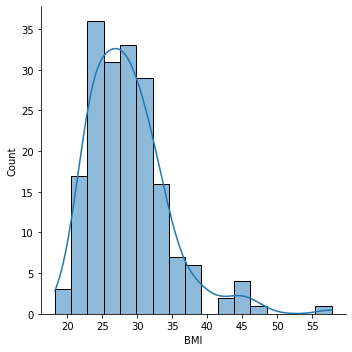

In [61]:
sns.displot(structured_data.reset_index().groupby("id").mean()["BMI"], kde = True)
structured_data.reset_index().groupby("id").mean()["BMI"].describe()

In [ ]:
sns.displot(structured_data.reset_index().groupby("id").first()["age"], kde = True)
structured_data.reset_index().groupby("id").first()["age"].describe()

count    2649.000000
mean       84.288553
std        15.116090
min        51.222222
25%        76.000000
50%        81.958333
75%        89.652174
max       479.750000
Name: bloodPreasure, dtype: float64

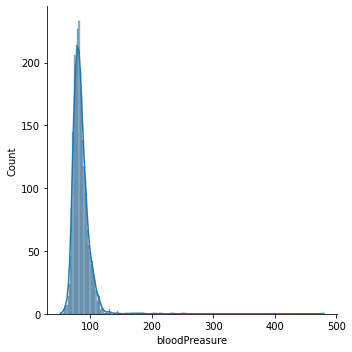

In [34]:
sns.displot(structured_data["bloodPressure"], kde = True)
structured_data["bloodPressure"].describe()

count    3208.000000
mean       36.783345
std         1.197611
min         3.600000
25%        36.336601
50%        36.786758
75%        37.275001
max        40.175000
Name: temperature, dtype: float64

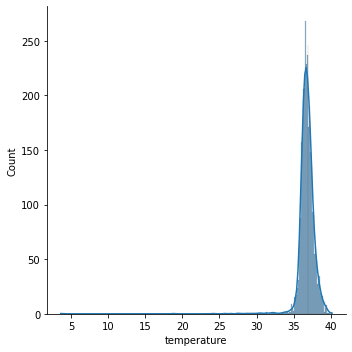

In [35]:
sns.displot(structured_data["temperature"], kde = True)
structured_data["temperature"].describe()

count    1896.000000
mean       94.689488
std         3.054211
min        61.333333
25%        93.500000
50%        95.000000
75%        96.333333
max       100.000000
Name: o2Saturation, dtype: float64

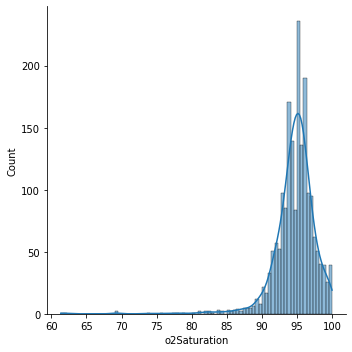

In [36]:
sns.displot(structured_data["o2Saturation"], kde = True)
structured_data["o2Saturation"].describe()

<AxesSubplot:title={'center':'temperature'}, xlabel='date'>

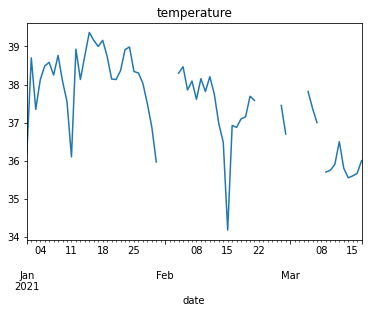

In [48]:
structured_data.loc[724440]["temperature"].plot(title="temperature")

<AxesSubplot:title={'center':'o2Saturation'}, xlabel='date'>

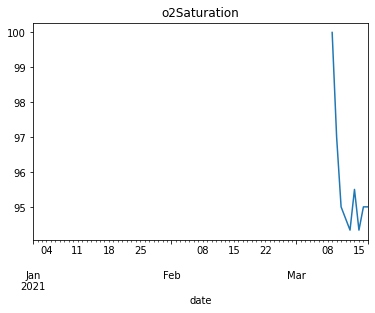

In [47]:
structured_data.loc[724440]["o2Saturation"].plot(title="o2Saturation")

In [39]:
structured_data.reset_index().groupby("id").first().groupby("specialism").count()["date"].sort_values(ascending = False)

specialism
Longziekten                                  124
Interne geneeskunde                           73
Overige artsen, SEH-arts                      11
Overige artsen, niet nader gespecificeerd      8
Cardiologie                                    5
Neurologie                                     4
Chirurgie                                      4
Orthopedie                                     2
Maag-,darm-en leverziekten                     2
Vrouwenziekten                                 1
Urologie                                       1
Plastische chirurgie                           1
Neurochirurgie                                 1
Anaesthesiologie                               1
Name: date, dtype: int64

In [53]:
df = structured_data.reset_index().groupby(["id"]).mean()[["BMI", "bloodPressure", "age", "daysOfHospital"]]


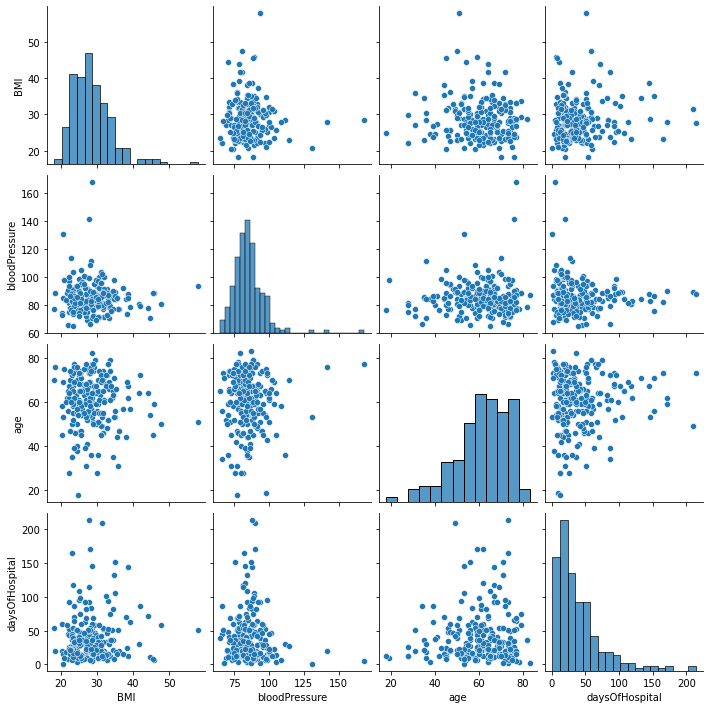

In [54]:
sns.pairplot(df)